## Observations and Insights 

In [27]:
%matplotlib inline

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_mousedata = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
# Display the data table for preview
merged_mousedata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [29]:
# Checking the number of mice.
merged_mousedata.nunique()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [30]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mousedata = merged_mousedata[merged_mousedata.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mousedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

In [31]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mousedata = merged_mousedata[merged_mousedata['Mouse ID'] != 'g989']
cleaned_mousedata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [32]:
# Checking the number of mice in the clean DataFrame.
cleaned_mousedata.nunique()

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

In [34]:
#trying to create grouped dataframe
group = cleaned_mousedata.groupby(cleaned_mousedata['Drug Regimen'])
group

## Summary Statistics

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = cleaned_mousedata.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = cleaned_mousedata.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
st_dev = cleaned_mousedata.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
m_var = cleaned_mousedata.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
m_sem = cleaned_mousedata.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.
summary_table = pd.DataFrame({'Mean':mean, 'Median':median, 'Variance':m_var, 'St. Dev':st_dev, 'SEM':m_sem})

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table

,Mean,Median,Variance,St. Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [35]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_table = cleaned_mousedata.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'std', 'var', 'sem'])
agg_table

,mean,median,std,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

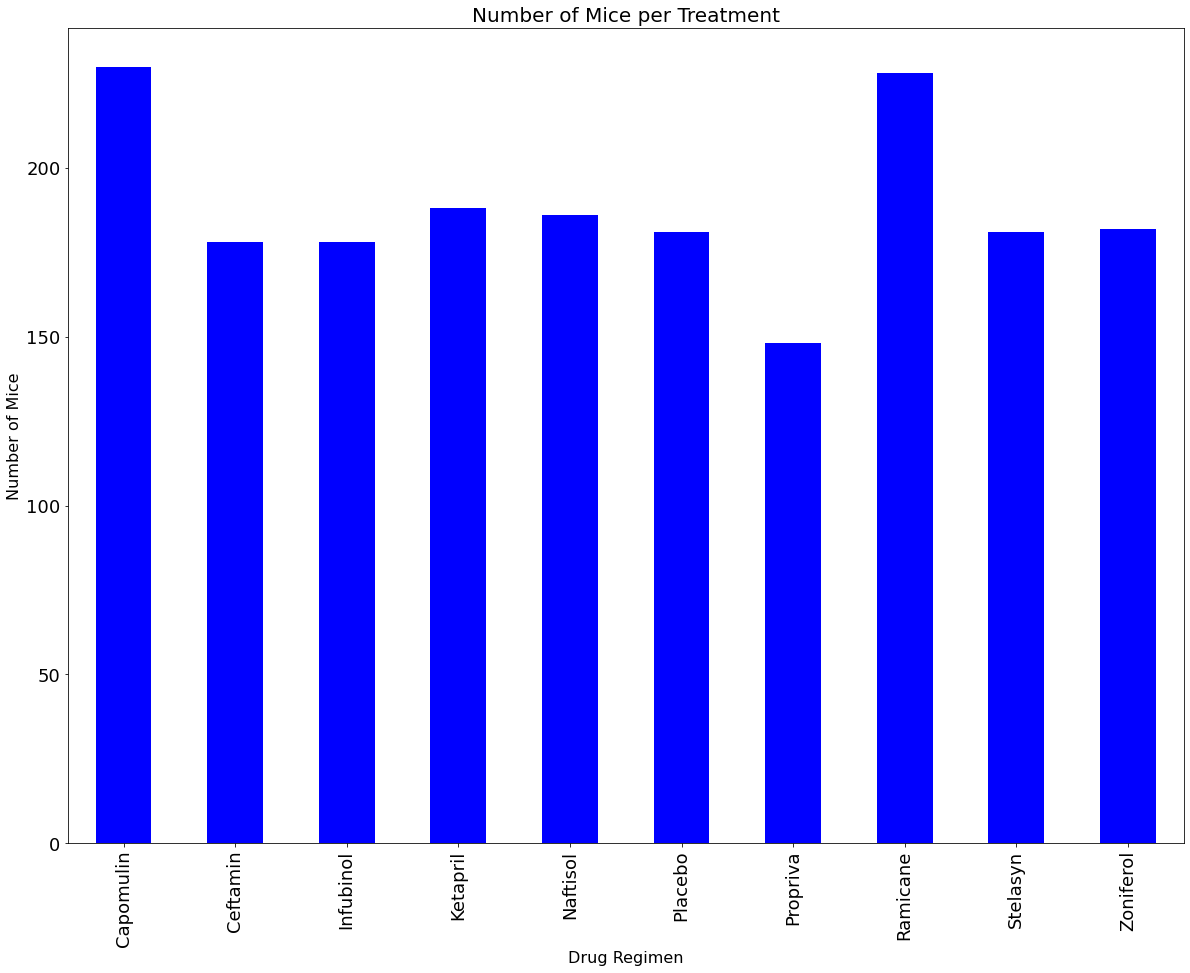

In [36]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#count mice per treatment
mice_groups = cleaned_mousedata.groupby('Drug Regimen')['Mouse ID'].count()

#plot bar
mice_groups.plot.bar(figsize=(20,15), color='blue', fontsize=18, align='center')
plt.xlabel('Drug Regimen', fontsize=16)
plt.ylabel('Number of Mice', fontsize=16)
plt.title('Number of Mice per Treatment', fontsize=20);

In [38]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#list number of mice per regimen
mice_list = cleaned_mousedata.groupby('Drug Regimen')['Mouse ID'].count().tolist()
#create x-axis of length of drug regimens
x_axis = x_axis = np.arange(len(mice_list)
#plot bar graph
plt.bar(x_axis, mice_list, color='blue', alpha=0.5, align='center')
# set x_axis ticks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubiniol', 'Ketrapil', 'Naftisol', 'Placebo', 'Propiva', 'Ramicane', 'Stelasyn', 'Zoniferol'])
# label axes and graph
plt.title('Number of Mice per Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')

SyntaxError: invalid syntax (<ipython-input-38-7092026a65ba>, line 7)

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas




In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#create sections of pie plot
labels = ['Female', 'Male']
for 

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
